### Range of efficiencies for colored solar cells
One basic question for decorative (colored) solar cells is how does the efficiency compare to
that of a non-decorative cell for a given color?  That is, if I want to make a red solar cell, how closely can I get to the conversion efficiency of a black (perfectly absorbing) solar cell?

To begin with, consider an idealized reflection spectrum of a step function with fixed width that gives rise to a particular color.  After initializing a structure in wptherml, we will assign
it such a reflection (and a complementary emissivity) using the function 
self.step_reflectivity(lambda_0, d_lambda)
where lambda_0 is the center wavelength and d_lambda is the width.

The following code will set up such a structure, render its color, classify its color (as red, orange, yello, green, blue, indigo, or violet), and compute its efficiency.

  Gradient will be taken with respect to all layers! 


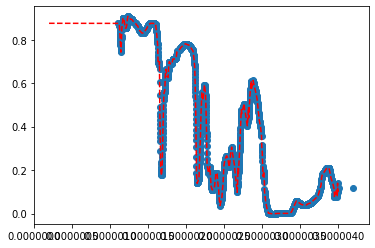

 Power absorbed is  142.3655651428669


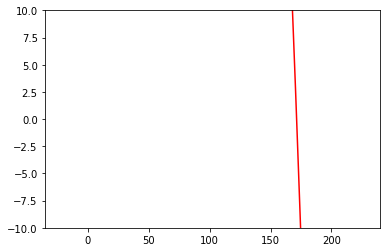

  Total number of above-threshold photons from sun: 3.245616583416508e+19
  Total number of above-threshold photons from BB: 5.135383010151094e+20


"\n### Get the SR function of Si\nSR = datalib.SR_Si(solar_skin.lambda_array)\n\n### This will set the reflectivity to 1 in a bandwidth of 100 nm about 600 nm\nsolar_skin.step_reflectivity(600e-9, 100e-9)\n\n### This will plot solar absorbance vs wavelength\nplt.plot(solar_skin.lambda_array*1e9, solar_skin.emissivity_array*AM/(1.4*1e9), 'g--')\n### This will plot spectral response vs wavelength\nplt.plot(solar_skin.lambda_array*1e9, SR, 'red')\nplt.show()\n\n### This will render the color of the structure\nsolar_skin.ambient_color()\n\n### This will classify the color... the result will \n### be stored in an attribute called 'solar_skin.color_name' which\n### can take on the value red, orange, yellow, green, blue, indigo, or violet\nsolar_skin.classify_color()\nprint(solar_skin.color_name)\n\n### This will compute the conversion efficiency\nsolar_skin.pv_conversion_efficiency()\nprint(solar_skin.conversion_efficiency_val*100)\n\nsolar_skin.step_reflectivity(5000e-9, 100e-9)\nsolar_skin

In [9]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from wptherml.datalib import datalib
from wptherml.numlib import numlib
from matplotlib import cm
import numpy as np
from scipy.optimize import minimize
h = 6.626e-34
c = 299792458.
### dictionary that stores basic properties 
### of the multilayer structure you want to simulate
structure = {
        'Temperature': 300,
        'Material_List' : ['Air', 'Si', 'Air'], 
        'Thickness_List': [0, 1000e-9, 0],
        'Lambda_List': [200e-9, 4000e-9, 10000]
     
}


solar_skin = multilayer(structure)
### Get the solar spectrum
AM = datalib.AM(solar_skin.lambda_array)
rho = datalib.BB(solar_skin.lambda_array, 200+273)
AMflux = AM * solar_skin.lambda_array / (h * c)
BBflux = np.pi * rho * solar_skin.lambda_array / (h * c)

AM_IR_tot = numlib.Integrate(AMflux, solar_skin.lambda_array, 3200e-9, 3500e-9)
BB_IR_tot = numlib.Integrate(BBflux, solar_skin.lambda_array, 3200e-9, 3500e-9)
poly = datalib.poly_styrene_T(solar_skin.lambda_array)

p_abs = numlib.Integrate(AM*(1-poly), solar_skin.lambda_array, 200e-9, 4000e-9)
print(" Power absorbed is ",p_abs)

T = np.linspace(250,500,200)
P_emit = []
diff = []
for temp in T:
    rho = datalib.BB(solar_skin.lambda_array, temp)
    pemit = 2 * np.pi * numlib.Integrate(rho*(1-poly), solar_skin.lambda_array, 200e-9, 4000e-9)
    P_emit.append(pemit)
    diff.append(p_abs - pemit)

plt.plot(T-273, diff, 'red')
plt.ylim(-10,10)
plt.show()


#Integrate(y, x, a, b)
#plt.plot(solar_skin.lambda_array, AM, 'red')
#plt.plot(solar_skin.lambda_array*1e9, AMflux*(1-poly), 'black')
#plt.plot(solar_skin.lambda_array*1e9, BBflux*(1-poly), 'red')
#plt.show()

print("  Total number of above-threshold photons from sun:",AM_IR_tot)
print("  Total number of above-threshold photons from BB:",BB_IR_tot)

'''
### Get the SR function of Si
SR = datalib.SR_Si(solar_skin.lambda_array)

### This will set the reflectivity to 1 in a bandwidth of 100 nm about 600 nm
solar_skin.step_reflectivity(600e-9, 100e-9)

### This will plot solar absorbance vs wavelength
plt.plot(solar_skin.lambda_array*1e9, solar_skin.emissivity_array*AM/(1.4*1e9), 'g--')
### This will plot spectral response vs wavelength
plt.plot(solar_skin.lambda_array*1e9, SR, 'red')
plt.show()

### This will render the color of the structure
solar_skin.ambient_color()

### This will classify the color... the result will 
### be stored in an attribute called 'solar_skin.color_name' which
### can take on the value red, orange, yellow, green, blue, indigo, or violet
solar_skin.classify_color()
print(solar_skin.color_name)

### This will compute the conversion efficiency
solar_skin.pv_conversion_efficiency()
print(solar_skin.conversion_efficiency_val*100)

solar_skin.step_reflectivity(5000e-9, 100e-9)
solar_skin.classify_color()
solar_skin.pv_conversion_efficiency()
ref = solar_skin.conversion_efficiency_val
print(ref)
'''


### Question: Can we systematically investigate the efficiency for different step profiles and also classify their color?  The following code scans through different step function profiles and computes and plots the efficiency for those that are classified as 'red'; expand the code so that it can capture and plot the efficieny of the other colors (orange, yellow, green, blue, indigo, and violet).

In [ ]:

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

N_points = 30
eta_vs_d = np.zeros((N_points,N_points))
d1_array = np.linspace(400e-9,780e-9,N_points)
d2_array = np.linspace(20e-9,100e-9,N_points)
delta = 0.1e-9

eff = []
for lam0 in d1_array:
    for dlam in d2_array:
        solar_skin.step_reflectivity(lam0, dlam)
        solar_skin.classify_color()
        solar_skin.pv_conversion_efficiency()
        if (solar_skin.color_name == 'red'):
            #eta_vs_d[i][j] = solar_skin.conversion_efficiency_val
            #ax.scatter(lam0*1e9, 1e9*dlam, solar_skin.conversion_efficiency_val, c='r', marker='o' )
            eff.append(solar_skin.conversion_efficiency_val)

#n_bins = 10
#n, bins, patches = ax.hist(eff, num_bins, density=1)
#plt.show()

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
#mu = 100  # mean of distribution
#sigma = 15  # standard deviation of distribution
#x = mu + sigma * np.random.randn(437)
x = 100*(ref - eff)
print(x)


num_bins = 30

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins)
'''
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
'''
ax.set_xlabel('Conversion Efficiency Reduction')
ax.set_ylabel('Frequency')
plt.show()
plt.savefig("Red_Efficiency_Hist.png")
